In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Linear Regression
### 1. Data Generation
Assume that the following linear model generates $n$ training data:

$y=w_{0}+w_{1}\cdot x + \epsilon$

where $\epsilon$ indicates a noise and $(w_{0},w_{1})$ is coefficients of linear model.

If we have $(x_{1}, \cdots, x_{n})$, then, we have $n$ outputs from the linear model as follows,

$y_{1}=w_{0}+w_{1}\cdot x_{1} + \epsilon_{1}$

$y_{2}=w_{0}+w_{1}\cdot x_{2} + \epsilon_{2}$

$\vdots$

$y_{n-1}=w_{0}+w_{1}\cdot x_{n-1} + \epsilon_{n-1}$

$y_{n}=w_{0}+w_{1}\cdot x_{n} + \epsilon_{n}$

The following block shows the data generation process.

In [4]:
w = np.random.randn(2,)
x_list = np.linspace(-10,10,100)
y_list = w[1]*x_list + w[0]

n_data = 100 # The number of data
std_noise = 1.5 # level of noise
x_data = 10*np.random.randn(n_data,) # Input points
y_data = w[1]*x_data + w[0] + std_noise*np.random.randn(n_data,) # Output points

### Variable Explanation
- n_data: the number of data
- std_noise: level of noise
- x_data: input points with shape (n_data,)
- y_data: output points with shape (n_data,)

### Visualization (Do not modify the following block)

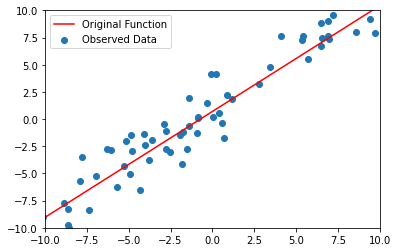

In [5]:
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_list, y_list, 'r', label='Original Function')
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(x_list),np.max(x_list)])
plt.legend()
plt.show()

## 2. Linear Regression 
The goal of linear regression is to find coefficients $\hat{w}_{0},\hat{w}_{1}$ such that

$y_{1}=\hat{w}_{0}+\hat{w}_{1}\cdot x_{1}$

$y_{2}=\hat{w}_{0}+\hat{w}_{1}\cdot x_{2}$

$\vdots$

$y_{n-1}=\hat{w}_{0}+\hat{w}_{1}\cdot x_{n-1}$

$y_{n}=\hat{w}_{0}+\hat{w}_{1}\cdot x_{n}$

Then, we can convert the above conditions into the linear equation as follows.

$$
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots\\
y_{n-1} \\
y_{n} \\
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1}\\
1 & x_{2}\\
\vdots & \vdots\\
1 & x_{n-1}\\
1 & x_{n}\\
\end{bmatrix}
\begin{bmatrix}
\hat{w}_{0}\\
\hat{w}_{1}
\end{bmatrix}
$$

Let $A=\begin{bmatrix}
1 & x_{1}\\
1 & x_{2}\\
\vdots & \vdots\\
1 & x_{n-1}\\
1 & x_{n}\\
\end{bmatrix}$, ${\bf y}=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots\\
y_{n-1} \\
y_{n} \\
\end{bmatrix}$, and ${\bf \hat{w}} = \begin{bmatrix}
\hat{w}_{0}\\
\hat{w}_{1}
\end{bmatrix}$.
Then, we can rewrite the linear equations into ${\bf y} = A{\bf \hat{w}}$.

How can we compute $\bf \hat{w}$? We can employ a pseudo inverse of $A$.
Let $A^{\dagger}$ be a pseudo inverse of $A$.
From the definition of pseudo inverse, the following properties hold.

- $AA^{\dagger}A = A$ 
- $A^{\dagger}AA^{\dagger} = A^{\dagger}$

In particular, when $A$ has linearly independent columns (and thus matrix $A^{T}A$ is invertible), $A^{\dagger}$ can be computed as

$A^{\dagger} = (A^{T}A)^{-1}A^{T}$

By using this condition, we can compute ${\bf \hat{w}}$ as follows,

$$
{\bf y} = A{\bf \hat{w}}
$$

$$
A^{T}{\bf y} = A^{T}A{\bf \hat{w}}
$$

$$
(A^{T}A)^{-1}A^{T}{\bf y} = {\bf \hat{w}}
$$

$$
A^{\dagger}{\bf y} = {\bf \hat{w}}
$$

### Now, implement linear regression by using numpy library. (Do not use other libraries)
### Variable Explanation
- w_est: estimated cofficients $\bf \hat{w}$
- y_est: estimated function values for the input list, x_list

In [6]:
A = np.array([x_data**d for d in range(2)]).T
# print(A)
w_est = np.linalg.pinv(A).dot(y_data)
y_est = w_est[1]*x_list + w_est[0]

### Visualization (Do not modify the following block)

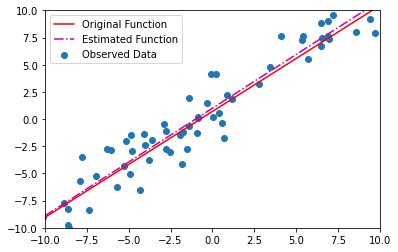

In [7]:
plt.scatter(x_data, y_data, label='Observed Data')
plt.plot(x_list, y_list, 'r', label='Original Function')
plt.plot(x_list, y_est, '-.m', label='Estimated Function')
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(x_list),np.max(x_list)])
plt.legend()
plt.show()